<a href="https://colab.research.google.com/github/brunokobi/Reconhecimento_Padrao/blob/main/KNNRLog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

training KNN
training Regressão logistica


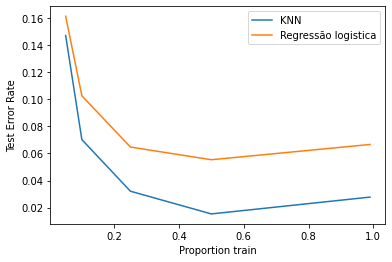

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
# Number of rounds to fit and evaluate an estimator.
rounds = 10
X, y = datasets.load_digits(return_X_y=True)

classifiers = [   
    (
        "KNN",
        KNeighborsClassifier(n_neighbors=3),
    ),   
    (
        "Regressão logistica",
        LogisticRegression(max_iter=110, solver="sag", tol=1e-1, C=1.0e4 / X.shape[0]),
    ),
]

xx = 1.0 - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=i, random_state=rng
            )
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()